ex1    6.1
ex2    8.6
y      1.0
dtype: float64
ex1    1.6
ex2    4.2
y     -1.0
dtype: float64


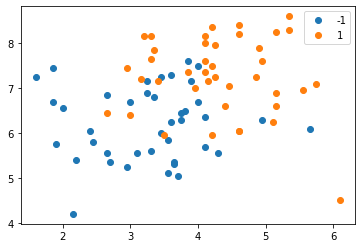

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from zipfile import ZipFile

# read in the theses dataset
with ZipFile('data/theses.zip') as zf:
    df = pd.read_csv(zf.open('admission.csv'), header=None, names=['ex1', 'ex2', 'y'])

fig, ax = plt.subplots()

for name, group in df.groupby('y'):
    ax.plot(group['ex1'], group['ex2'], marker='o', linestyle='', label=name)
ax.legend()


print(df.max())
print(df.min())

plt.show()

In [4]:
# partition in train and test
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]

Xtr = train[['ex1', 'ex2']].to_numpy()
Ytr = train['y'].to_numpy()

Xte = test[['ex1', 'ex2']].to_numpy()
Yte = test['y'].to_numpy()

print(df.shape)
print(df.size)

(80, 3)
240


In [5]:
a0 = 0
a = np.random.rand(df.shape[1]-1)  # third col is target

# predict; technically, we're only interested of the sign here.
def pred(x):
    return a0 + np.dot(a, x)


# compute the loss for a list of samples
def loss(xs, ys):
    l = 0
    for x, y in zip(xs, ys):
        p = pred(x)

        # misclassified?
        if y * p < 0:
            l -= (y * p)
    return l


rate = 1.0
iters = 1000
for it in range(0, 1000):
    # take a random sample
    i = np.random.choice(range(len(Xtr)))
    x = Xtr[i]
    y = Ytr[i]
    
    # predict
    yhat = pred(x)
    # print(x, y, yhat)

    if y * yhat < 0:
        a0 = a0 + rate * y    # easy: all scalars.
        a = a + rate * y * x  # numpy ftw! element-wise ops
        # print(a0, a)

    # print training and test loss
    if it % 100 == 0:
        print(it, loss(Xtr, Ytr), loss(Xte, Yte))

# all done
print(a0, a)

0 2513.116125583679 135.5469209948487
100 42.406176554449765 1.5730018232028966
200 638.2011255836779 33.796920994848634
300 1142.3763457995958 89.68620150353226
400 1453.4438457995964 102.25120150353234
500 2070.328845799598 148.08120150353247
600 1722.0563457995986 118.58120150353257
700 545.2842455406507 26.995501823203156
800 388.13122334486593 13.543001823203191
900 243.00306265216923 5.800501823203213
-39.0 [11.89055496 -0.73161217]
